In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


### 1. Hình 1

#### a. Lấy mẫu đối tượng

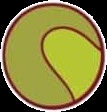

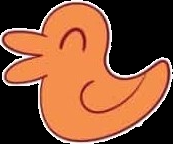

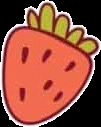

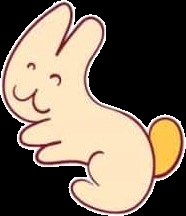

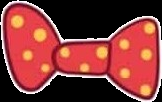

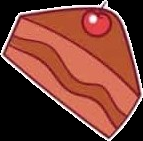

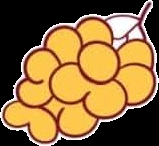

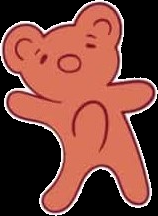

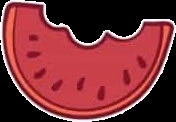

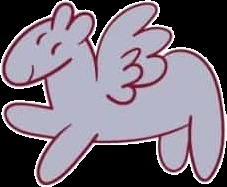

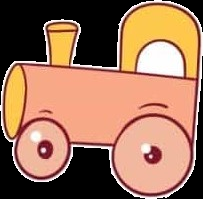

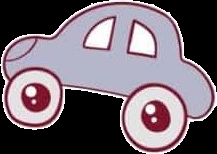

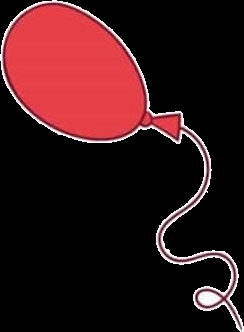

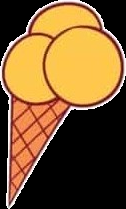

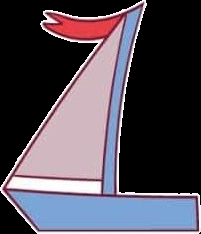

Đã lưu 15 ảnh vào thư mục: /content/drive/My Drive/Colab Notebooks/ảnh nhận diện 3/


In [ ]:
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow

# Đọc ảnh
image = cv2.imread("/content/drive/My Drive/Colab Notebooks/5.jpg")

# Tạo thư mục lưu ảnh nếu chưa tồn tại
output_folder = "/content/drive/My Drive/Colab Notebooks/ảnh nhận diện 3/"
os.makedirs(output_folder, exist_ok=True)

# Chuyển đổi ảnh sang ảnh xám
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Áp dụng Gaussian blur để giảm nhiễu
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# Áp dụng threshold để chuyển ảnh thành đen trắng
_, threshold = cv2.threshold(blur, 245, 255, cv2.THRESH_BINARY_INV)

# Tìm các đường viền (contours) trong ảnh đã qua xử lý threshold
contours, _ = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Vòng lặp qua các đường viền và xử lý từng vật thể
object_num = 0
for contour in contours:
    # Bỏ qua các vật thể có diện tích nhỏ (giúp bỏ qua các phần dính nhỏ)
    area = cv2.contourArea(contour)
    if area < 500:  # Ngưỡng diện tích có thể điều chỉnh
        continue

    # Tạo một mặt nạ (mask) cùng kích thước với ảnh gốc, toàn màu đen
    mask = np.zeros_like(image)

    # Vẽ đường viền của vật thể lên mặt nạ, tô màu trắng bên trong
    cv2.drawContours(mask, [contour], -1, (255, 255, 255), thickness=cv2.FILLED)

    # Cắt ra phần ảnh gốc chỉ chứa vật thể (giữ lại các phần màu trắng trên mặt nạ)
    object_image = cv2.bitwise_and(image, mask)

    # Tìm hình chữ nhật giới hạn vật thể để cắt riêng phần cần hiển thị
    x, y, w, h = cv2.boundingRect(contour)
    object_image_cropped = object_image[y:y+h, x:x+w]

    # Hiển thị từng vật thể đã được tách (tùy chọn)
    cv2_imshow(object_image_cropped)

    # Tạo đường dẫn để lưu ảnh
    output_path = os.path.join(output_folder, f"object_{object_num}.png")

    # Lưu ảnh đã tách vào thư mục
    cv2.imwrite(output_path, object_image_cropped)

    # Tăng số đếm của vật thể
    object_num += 1

print(f"Đã lưu {object_num} ảnh vào thư mục: {output_folder}")


#### b.Nhận diện đối tượng

Vật thể 0: Tìm thấy vị trí khớp với scale 0.60
Vật thể 1: Tìm thấy vị trí khớp với scale 0.72
Vật thể 2: Tìm thấy vị trí khớp với scale 0.57
Vật thể 3: Tìm thấy vị trí khớp với scale 0.72
Vật thể 4: Tìm thấy vị trí khớp với scale 0.47
Vật thể 5: Tìm thấy vị trí khớp với scale 0.58
Vật thể 6: Tìm thấy vị trí khớp với scale 0.72
Vật thể 7: Tìm thấy vị trí khớp với scale 0.61
Vật thể 8: Tìm thấy vị trí khớp với scale 0.49
Vật thể 9: Tìm thấy vị trí khớp với scale 0.59
Vật thể 10: Tìm thấy vị trí khớp với scale 0.72
Vật thể 11: Tìm thấy vị trí khớp với scale 0.72
Vật thể 12: Tìm thấy vị trí khớp với scale 0.61
Vật thể 13: Tìm thấy vị trí khớp với scale 0.72
Vật thể 14: Tìm thấy vị trí khớp với scale 0.71


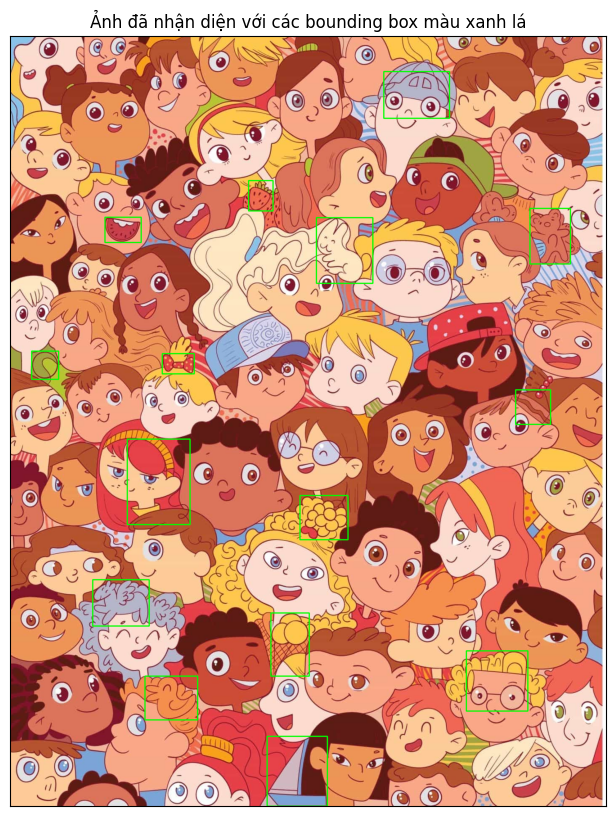

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Đọc ảnh chính dưới dạng màu
image = cv2.imread("/content/drive/My Drive/Colab Notebooks/6.jpg")  # Ảnh chính bức tranh lớn (màu)

# Phát hiện biên cạnh trên ảnh chính (chỉ áp dụng trên ảnh xám để tìm biên cạnh)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_edges = cv2.Canny(image_gray, 50, 200)

# Đường dẫn đến thư mục chứa các ảnh mẫu
template_folder = "/content/drive/My Drive/Colab Notebooks/ảnh nhận diện 3/"

# Thực hiện cho các object từ object_0 đến object_14
for i in range(15):  # object_0 đến object_14
    template_path = os.path.join(template_folder, f"object_{i}.png")  # Tạo đường dẫn cho từng ảnh mẫu
    template = cv2.imread(template_path, 0)  # Đọc ảnh mẫu (xám)

    if template is None:
        print(f"Không tìm thấy {template_path}, bỏ qua.")
        continue

    # Lưu lại vị trí tốt nhất và tỉ lệ phù hợp nhất cho mỗi object
    best_match_val = -1
    best_match_loc = None
    best_template = None
    best_scale = 1.0

    # Thử nghiệm trên nhiều tỉ lệ
    for scale in np.linspace(0.4, 0.9, 51):  # Thử từ tỉ lệ 60% đến 90% so với kích thước gốc
        # Thay đổi kích thước của ảnh mẫu
        template_resized = cv2.resize(template, (0, 0), fx=scale, fy=scale)

        # Kiểm tra nếu kích thước của ảnh mẫu vượt quá ảnh chính thì bỏ qua
        if template_resized.shape[0] > image_gray.shape[0] or template_resized.shape[1] > image_gray.shape[1]:
            continue

        # Phát hiện biên cạnh trên ảnh mẫu đã thay đổi kích thước
        template_edges = cv2.Canny(template_resized, 50, 200)

        # So khớp mẫu (template matching)
        result = cv2.matchTemplate(image_edges, template_edges, cv2.TM_CCOEFF)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

        # Cập nhật nếu tìm thấy kết quả so khớp tốt hơn
        if max_val > best_match_val:
            best_match_val = max_val
            best_match_loc = max_loc
            best_template = template_resized
            best_scale = scale

    # Vẽ hình chữ nhật quanh khu vực khớp mẫu tốt nhất
    if best_match_loc is not None:
        top_left = best_match_loc
        h, w = best_template.shape
        bottom_right = (top_left[0] + w, top_left[1] + h)
        # Vẽ bounding box màu xanh lá trên ảnh chính (ảnh màu)
        cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)  # Màu xanh lá (0, 255, 0)

        # In thông tin đã nhận diện
        print(f"Vật thể {i}: Tìm thấy vị trí khớp với scale {best_scale:.2f}")

# Hiển thị ảnh kết quả nhận diện với các bounding box màu xanh lá
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Chuyển sang RGB để hiển thị với matplotlib
plt.title('Ảnh đã nhận diện với các bounding box màu xanh lá')
plt.xticks([]), plt.yticks([])
plt.show()


### 2. Hình 2

#### a. Lấy mẫu đối tượng

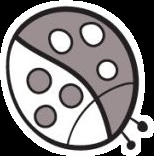

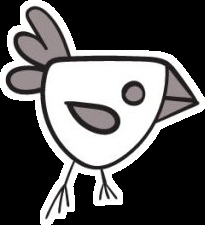

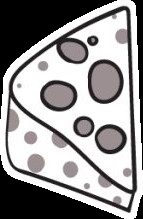

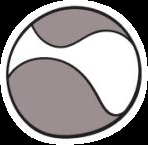

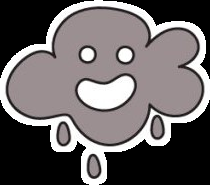

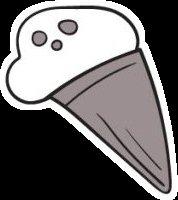

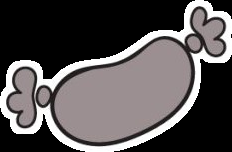

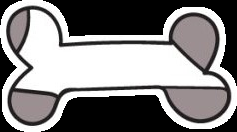

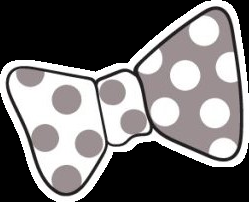

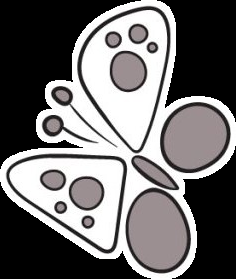

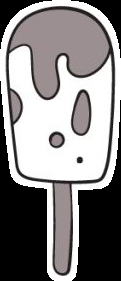

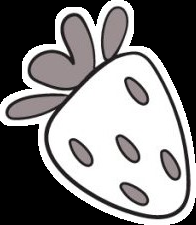

Đã lưu 12 ảnh vào thư mục: /content/drive/My Drive/Colab Notebooks/ảnh nhận diện 5/


In [ ]:
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow

# Đọc ảnh từ file mới
image = cv2.imread("/content/drive/My Drive/Colab Notebooks/8.jpg")

# Tạo thư mục lưu ảnh nếu chưa tồn tại
output_folder = "/content/drive/My Drive/Colab Notebooks/ảnh nhận diện 5/"
os.makedirs(output_folder, exist_ok=True)

# Chuyển đổi ảnh sang ảnh xám
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Áp dụng Gaussian blur để giảm nhiễu
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# Áp dụng threshold để chuyển ảnh thành đen trắng
_, threshold = cv2.threshold(blur, 245, 255, cv2.THRESH_BINARY_INV)

# Áp dụng phép toán giãn nở để đóng các khoảng trống nhỏ giữa các bộ phận của vật thể
kernel = np.ones((5, 5), np.uint8)
dilated = cv2.dilate(threshold, kernel, iterations=2)

# Tìm các đường viền (contours) trong ảnh đã qua xử lý dilation
contours, _ = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Vòng lặp qua các đường viền và xử lý từng vật thể
object_num = 0
for contour in contours:
    # Bỏ qua các vật thể có diện tích nhỏ (giúp bỏ qua các phần dính nhỏ)
    area = cv2.contourArea(contour)
    if area < 500:  # Ngưỡng diện tích có thể điều chỉnh
        continue

    # Tạo một mặt nạ (mask) cùng kích thước với ảnh gốc, toàn màu đen
    mask = np.zeros_like(image)

    # Vẽ đường viền của vật thể lên mặt nạ, tô màu trắng bên trong
    cv2.drawContours(mask, [contour], -1, (255, 255, 255), thickness=cv2.FILLED)

    # Cắt ra phần ảnh gốc chỉ chứa vật thể (giữ lại các phần màu trắng trên mặt nạ)
    object_image = cv2.bitwise_and(image, mask)

    # Tìm hình chữ nhật giới hạn vật thể để cắt riêng phần cần hiển thị
    x, y, w, h = cv2.boundingRect(contour)
    object_image_cropped = object_image[y:y+h, x:x+w]

    # Hiển thị từng vật thể đã được tách (tùy chọn)
    cv2_imshow(object_image_cropped)

    # Tạo đường dẫn để lưu ảnh
    output_path = os.path.join(output_folder, f"object_{object_num}.png")

    # Lưu ảnh đã tách vào thư mục
    cv2.imwrite(output_path, object_image_cropped)

    # Tăng số đếm của vật thể
    object_num += 1

print(f"Đã lưu {object_num} ảnh vào thư mục: {output_folder}")


#### b.Nhận diện đối tượng

Vật thể 0: Tìm thấy vị trí khớp với scale 0.79
Vật thể 1: Tìm thấy vị trí khớp với scale 0.72
Vật thể 2: Tìm thấy vị trí khớp với scale 0.79
Vật thể 3: Tìm thấy vị trí khớp với scale 0.79
Vật thể 4: Tìm thấy vị trí khớp với scale 0.79
Vật thể 5: Tìm thấy vị trí khớp với scale 0.79
Vật thể 6: Tìm thấy vị trí khớp với scale 0.73
Vật thể 7: Tìm thấy vị trí khớp với scale 0.67
Vật thể 8: Tìm thấy vị trí khớp với scale 0.78
Vật thể 9: Tìm thấy vị trí khớp với scale 0.78
Vật thể 10: Tìm thấy vị trí khớp với scale 0.78
Vật thể 11: Tìm thấy vị trí khớp với scale 0.78
Không tìm thấy /content/drive/My Drive/Colab Notebooks/ảnh nhận diện 5/object_12.png, bỏ qua.
Không tìm thấy /content/drive/My Drive/Colab Notebooks/ảnh nhận diện 5/object_13.png, bỏ qua.
Không tìm thấy /content/drive/My Drive/Colab Notebooks/ảnh nhận diện 5/object_14.png, bỏ qua.


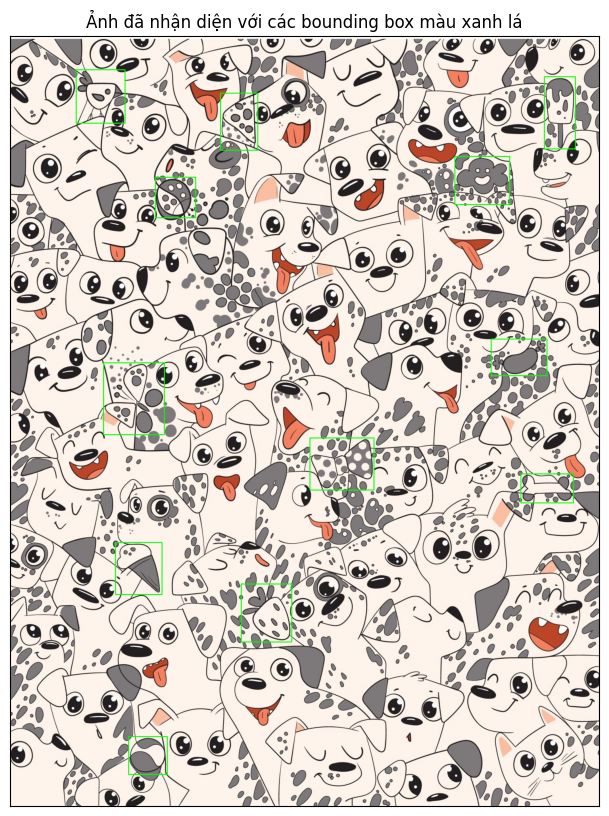

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Đọc ảnh chính dưới dạng màu
image = cv2.imread("/content/drive/My Drive/Colab Notebooks/7.jpg")  # Ảnh chính bức tranh lớn (màu)

# Phát hiện biên cạnh trên ảnh chính (chỉ áp dụng trên ảnh xám để tìm biên cạnh)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_edges = cv2.Canny(image_gray, 50, 200)

# Đường dẫn đến thư mục chứa các ảnh mẫu
template_folder = "/content/drive/My Drive/Colab Notebooks/ảnh nhận diện 5/"

# Thực hiện cho các object từ object_0 đến object_14
for i in range(15):  # object_0 đến object_14
    template_path = os.path.join(template_folder, f"object_{i}.png")  # Tạo đường dẫn cho từng ảnh mẫu
    template = cv2.imread(template_path, 0)  # Đọc ảnh mẫu (xám)

    if template is None:
        print(f"Không tìm thấy {template_path}, bỏ qua.")
        continue

    # Lưu lại vị trí tốt nhất và tỉ lệ phù hợp nhất cho mỗi object
    best_match_val = -1
    best_match_loc = None
    best_template = None
    best_scale = 1.0

    # Thử nghiệm trên nhiều tỉ lệ
    for scale in np.linspace(0.4, 0.9, 51):  # Thử từ tỉ lệ 60% đến 90% so với kích thước gốc
        # Thay đổi kích thước của ảnh mẫu
        template_resized = cv2.resize(template, (0, 0), fx=scale, fy=scale)

        # Kiểm tra nếu kích thước của ảnh mẫu vượt quá ảnh chính thì bỏ qua
        if template_resized.shape[0] > image_gray.shape[0] or template_resized.shape[1] > image_gray.shape[1]:
            continue

        # Phát hiện biên cạnh trên ảnh mẫu đã thay đổi kích thước
        template_edges = cv2.Canny(template_resized, 50, 200)

        # So khớp mẫu (template matching)
        result = cv2.matchTemplate(image_edges, template_edges, cv2.TM_CCOEFF)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

        # Cập nhật nếu tìm thấy kết quả so khớp tốt hơn
        if max_val > best_match_val:
            best_match_val = max_val
            best_match_loc = max_loc
            best_template = template_resized
            best_scale = scale

    # Vẽ hình chữ nhật quanh khu vực khớp mẫu tốt nhất
    if best_match_loc is not None:
        top_left = best_match_loc
        h, w = best_template.shape
        bottom_right = (top_left[0] + w, top_left[1] + h)
        # Vẽ bounding box màu xanh lá trên ảnh chính (ảnh màu)
        cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)  # Màu xanh lá (0, 255, 0)

        # In thông tin đã nhận diện
        print(f"Vật thể {i}: Tìm thấy vị trí khớp với scale {best_scale:.2f}")

# Hiển thị ảnh kết quả nhận diện với các bounding box màu xanh lá
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Chuyển sang RGB để hiển thị với matplotlib
plt.title('Ảnh đã nhận diện với các bounding box màu xanh lá')
plt.xticks([]), plt.yticks([])
plt.show()


In [ ]:
### Ảnh 12,13,14 trong folder trên là ảnh rỗng - hình con chó chỉ cần tìm 12 ảnh